In [2]:
import numpy as np # importing base libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Exploratory Data Analysis

#### Data Reading

In [3]:
df = pd.read_csv('data.csv', encoding = 'unicode_escape')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.shape

(541909, 8)

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [9]:
# convert Invoice date dtype into DateTime Object

In [10]:
df["Year"]=pd.DatetimeIndex(df['InvoiceDate']).year # here we make a column of year

In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010


In [12]:
df['Revenue']=df['Quantity']*df['UnitPrice'] # Here generate a column name as Revenue/////  Revenue = df['Revenue']=df['Quantity']*df['UnitPrice']

In [13]:
df['Revenue']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: Revenue, Length: 541909, dtype: float64

In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,20.34


###### Here we are creating a new df as sales where Quantity of ltem is grater than Zero. 

In [15]:
sales = df.loc[df['Quantity']>0]

In [16]:
sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,20.34


In [17]:
# Here we are extracting confirmed sales it means Quantity grater than zero.

In [18]:
sales.shape

(531285, 10)

In [19]:
sales_mean=sales.groupby('Year')['Revenue'].mean() # Here we are calculating mean value of revenue year wise.

In [20]:
sales_mean.head()

Year
2010    19.762161
2011    20.058771
Name: Revenue, dtype: float64

In [21]:
## It means in 2010 mean value of revenue is 19.76 and in 2011 mean value of revenue is 20. 

In [22]:
sales_finish=sales[sales['CustomerID'].notna()] # here we are calculating total finsh sales 

In [23]:
sales_finish.count()

InvoiceNo      397924
StockCode      397924
Description    397924
Quantity       397924
InvoiceDate    397924
UnitPrice      397924
CustomerID     397924
Country        397924
Year           397924
Revenue        397924
dtype: int64

In [24]:
count_finished=sales_finish.groupby('Year')['InvoiceNo'].count()

In [25]:
count_finished.head()

Year
2010     26160
2011    371764
Name: InvoiceNo, dtype: int64

In [26]:
## in 2010 26160 sucsessfull ordered
## In 2011 371764 sucessfull ordered

In [27]:
purchase_cancled=df[df['InvoiceNo'].str.contains("C")]

In [28]:
purchase_cancled

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Revenue
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,2010,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,2010,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,2010,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,2010,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,2010,-6.96
...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom,2011,-9.13
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom,2011,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom,2011,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom,2011,-1.25


In [29]:
purchase_cancled.value_counts().sum()

8905

##### Here have seen that 8905 order is cancled.

In [30]:
count_cancled=purchase_cancled.groupby('Year')['InvoiceNo'].count()

In [31]:
count_cancled

Year
2010     728
2011    8560
Name: InvoiceNo, dtype: int64

In [32]:
## in 2010 728 ordered canceled
## In 2011 8560 ordered canceled

### Data Cleaning

#### Cleaning Quantity column

In [33]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Year                0
Revenue             0
dtype: int64

In [34]:
df['Quantity'].value_counts()

 1        148227
 2         81829
 12        61063
 6         40868
 4         38484
           ...  
-472           1
-161           1
-1206          1
-272           1
-80995         1
Name: Quantity, Length: 722, dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   Year         541909 non-null  int64  
 9   Revenue      541909 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 41.3+ MB


In [36]:
quantity_less_than_zero=df['Quantity'].loc[df['Quantity']<0].values

In [37]:
quantity_less_than_zero

array([ -1,  -1, -12, ...,  -5,  -1,  -5], dtype=int64)

In [38]:
def handle_quantity(value):

    if value in quantity_less_than_zero:
        value = 0
    else:
        return value
df['Quantity']=df['Quantity'].apply(handle_quantity)

In [39]:
df[df['InvoiceNo'].str.contains("C")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Revenue
141,C536379,D,Discount,NaN,12/1/2010 9:41,27.50,14527.0,United Kingdom,2010,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,NaN,12/1/2010 9:49,4.65,15311.0,United Kingdom,2010,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,NaN,12/1/2010 10:24,1.65,17548.0,United Kingdom,2010,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,NaN,12/1/2010 10:24,0.29,17548.0,United Kingdom,2010,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,NaN,12/1/2010 10:24,0.29,17548.0,United Kingdom,2010,-6.96
...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,NaN,12/9/2011 9:57,0.83,14397.0,United Kingdom,2011,-9.13
541541,C581499,M,Manual,NaN,12/9/2011 10:28,224.69,15498.0,United Kingdom,2011,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,NaN,12/9/2011 11:57,10.95,15311.0,United Kingdom,2011,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,NaN,12/9/2011 11:58,1.25,17315.0,United Kingdom,2011,-1.25


In [40]:
# here we see that our negative value replace with NaN and now we will replace NaN with zeros.

In [41]:
df['Quantity']=df['Quantity'].fillna(0)

In [42]:
df[df['InvoiceNo'].str.contains("C")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Revenue
141,C536379,D,Discount,0.0,12/1/2010 9:41,27.50,14527.0,United Kingdom,2010,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,0.0,12/1/2010 9:49,4.65,15311.0,United Kingdom,2010,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,0.0,12/1/2010 10:24,1.65,17548.0,United Kingdom,2010,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,0.0,12/1/2010 10:24,0.29,17548.0,United Kingdom,2010,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,0.0,12/1/2010 10:24,0.29,17548.0,United Kingdom,2010,-6.96
...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,0.0,12/9/2011 9:57,0.83,14397.0,United Kingdom,2011,-9.13
541541,C581499,M,Manual,0.0,12/9/2011 10:28,224.69,15498.0,United Kingdom,2011,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,0.0,12/9/2011 11:57,10.95,15311.0,United Kingdom,2011,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,0.0,12/9/2011 11:58,1.25,17315.0,United Kingdom,2011,-1.25


In [43]:
# we have successfully replaced NaN value with Zeros

###### Now we will create a new Revenue column as New_Revenue

In [44]:
df['New_Revenue']=df['Quantity']*df['UnitPrice']

In [45]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Revenue,New_Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010,15.30,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,20.34,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010,22.00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,20.34,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,20.34,20.34


######  Now we drop unwanted column.

In [46]:
df.drop(['InvoiceNo','StockCode','Description','InvoiceDate','Revenue'],axis=1,inplace=True)

In [47]:
df.head()

,Quantity,UnitPrice,CustomerID,Country,Year,New_Revenue
0,6.0,2.55,17850.0,United Kingdom,2010,15.30
1,6.0,3.39,17850.0,United Kingdom,2010,20.34
2,8.0,2.75,17850.0,United Kingdom,2010,22.00
3,6.0,3.39,17850.0,United Kingdom,2010,20.34
4,6.0,3.39,17850.0,United Kingdom,2010,20.34


In [48]:
df.tail()

,Quantity,UnitPrice,CustomerID,Country,Year,New_Revenue
541904,12.0,0.85,12680.0,France,2011,10.20
541905,6.0,2.10,12680.0,France,2011,12.60
541906,4.0,4.15,12680.0,France,2011,16.60
541907,4.0,4.15,12680.0,France,2011,16.60
541908,3.0,4.95,12680.0,France,2011,14.85


In [49]:
df.isnull().sum()

Quantity            0
UnitPrice           0
CustomerID     135080
Country             0
Year                0
New_Revenue         0
dtype: int64

###### Dropping Null value

In [50]:
df.dropna(inplace=True)

In [51]:
df.isnull().sum()

Quantity       0
UnitPrice      0
CustomerID     0
Country        0
Year           0
New_Revenue    0
dtype: int64

In [52]:
df.head()

,Quantity,UnitPrice,CustomerID,Country,Year,New_Revenue
0,6.0,2.55,17850.0,United Kingdom,2010,15.30
1,6.0,3.39,17850.0,United Kingdom,2010,20.34
2,8.0,2.75,17850.0,United Kingdom,2010,22.00
3,6.0,3.39,17850.0,United Kingdom,2010,20.34
4,6.0,3.39,17850.0,United Kingdom,2010,20.34


In [53]:
df.shape

(406829, 6)

### Data Visualization

###### Visualization Quantity Column

(array([4.06826e+05, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([    0. ,  8099.5, 16199. , 24298.5, 32398. , 40497.5, 48597. ,
        56696.5, 64796. , 72895.5, 80995. ]),
 <BarContainer object of 10 artists>)

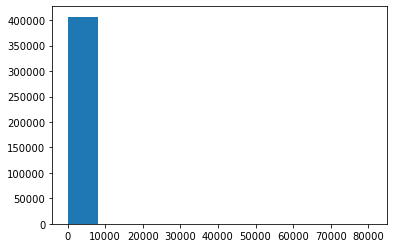

In [54]:
plt.hist(df['Quantity'])

###### Mostly no of product purchased in one time is less than 25. 


(array([154661.,  68204.,  36401.,  12066.,  12973.,  10744.,   6185.,
          1204.,   4879.,   1407.]),
 array([ 1. ,  2.4,  3.8,  5.2,  6.6,  8. ,  9.4, 10.8, 12.2, 13.6, 15. ]),
 <BarContainer object of 10 artists>)

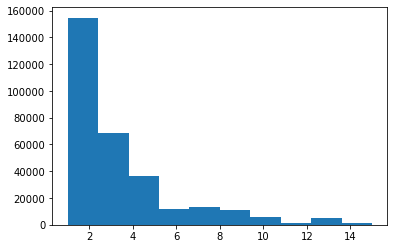

In [55]:
plt.hist(df['UnitPrice'],range=(1,15))

###### in most of cases unit price is between 1 to 5 Pound. It means that unit price of product is between 1 Pound to 5 Pound.

(array([    0., 25888., 55956., 55442., 71086., 53954., 55300., 54627.,
        34576.,     0.]),
 array([11000., 11850., 12700., 13550., 14400., 15250., 16100., 16950.,
        17800., 18650., 19500.]),
 <BarContainer object of 10 artists>)

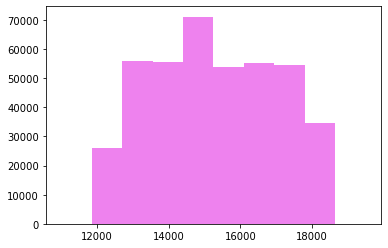

In [56]:
plt.hist(df['CustomerID'],range=(11000,19500),color='violet')

C:\Users\Kishan Ji\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, 'United Kingdom'),
  Text(1, 0, 'France'),
  Text(2, 0, 'Australia'),
  Text(3, 0, 'Netherlands'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'Norway'),
  Text(6, 0, 'EIRE'),
  Text(7, 0, 'Switzerland'),
  Text(8, 0, 'Spain'),
  Text(9, 0, 'Poland'),
  Text(10, 0, 'Portugal'),
  Text(11, 0, 'Italy'),
  Text(12, 0, 'Belgium'),
  Text(13, 0, 'Lithuania'),
  Text(14, 0, 'Japan'),
  Text(15, 0, 'Iceland'),
  Text(16, 0, 'Channel Islands'),
  Text(17, 0, 'Denmark'),
  Text(18, 0, 'Cyprus'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Austria'),
  Text(21, 0, 'Israel'),
  Text(22, 0, 'Finland'),
  Text(23, 0, 'Greece'),
  Text(24, 0, 'Singapore'),
  Text(25, 0, 'Lebanon'),
  Text(26, 0, 'United Arab Emirates'),
  Text(27, 0, 'Saudi Arabia'),
  Text(28, 0, 'Czech Republic'),
  Text(29, 0, 'Canada'),
  Text(30, 0, 'Uns

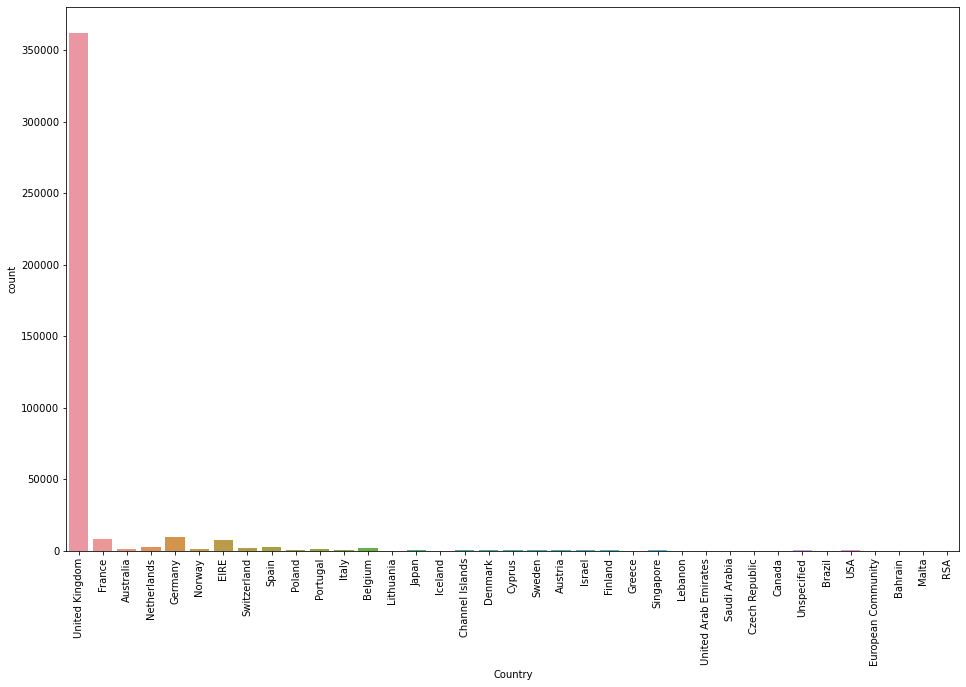

In [57]:
plt.figure(figsize=(16,10))
ax=sns.countplot(df['Country'],data=df)
plt.xticks(rotation=90)

##### Most of our customer approx 490000 customer From United Kingdom

C:\Users\Kishan Ji\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='count'>

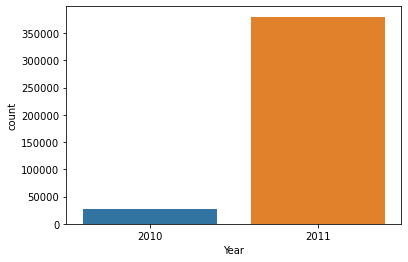

In [58]:
sns.countplot(df['Year'],data=df)


###### here we clearly see that our sell is raise in 2011, were 2010's sell is 28000 and 2011's sell is approx 470000

(array([180339., 121928.,  34835.,  13858.,   6933.,   4129.,   3719.,
          3138.,   2481.,   1154.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <BarContainer object of 10 artists>)

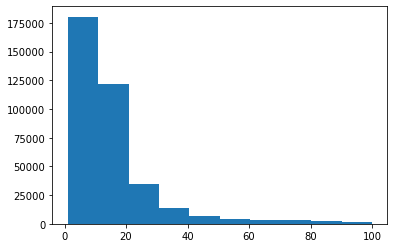

In [59]:
plt.hist(df['New_Revenue'],range=(1,100))

###### Our revenue generate from each customer is between 1 to 20 doller.

In [60]:
df.head()

,Quantity,UnitPrice,CustomerID,Country,Year,New_Revenue
0,6.0,2.55,17850.0,United Kingdom,2010,15.30
1,6.0,3.39,17850.0,United Kingdom,2010,20.34
2,8.0,2.75,17850.0,United Kingdom,2010,22.00
3,6.0,3.39,17850.0,United Kingdom,2010,20.34
4,6.0,3.39,17850.0,United Kingdom,2010,20.34


##### Dropping Year column

In [61]:
df=df.drop(['Year'],axis=1)

In [62]:
df.head()

,Quantity,UnitPrice,CustomerID,Country,New_Revenue
0,6.0,2.55,17850.0,United Kingdom,15.30
1,6.0,3.39,17850.0,United Kingdom,20.34
2,8.0,2.75,17850.0,United Kingdom,22.00
3,6.0,3.39,17850.0,United Kingdom,20.34
4,6.0,3.39,17850.0,United Kingdom,20.34


###### Label Encoding

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [64]:
le.fit_transform((df.Country).values)
le_country= dict(zip(le.classes_,le.transform(le.classes_)))
le_country

{'Australia': 0,
 'Austria': 1,
 'Bahrain': 2,
 'Belgium': 3,
 'Brazil': 4,
 'Canada': 5,
 'Channel Islands': 6,
 'Cyprus': 7,
 'Czech Republic': 8,
 'Denmark': 9,
 'EIRE': 10,
 'European Community': 11,
 'Finland': 12,
 'France': 13,
 'Germany': 14,
 'Greece': 15,
 'Iceland': 16,
 'Israel': 17,
 'Italy': 18,
 'Japan': 19,
 'Lebanon': 20,
 'Lithuania': 21,
 'Malta': 22,
 'Netherlands': 23,
 'Norway': 24,
 'Poland': 25,
 'Portugal': 26,
 'RSA': 27,
 'Saudi Arabia': 28,
 'Singapore': 29,
 'Spain': 30,
 'Sweden': 31,
 'Switzerland': 32,
 'USA': 33,
 'United Arab Emirates': 34,
 'United Kingdom': 35,
 'Unspecified': 36}

In [65]:
df.Country=le.fit_transform(df.Country)

In [66]:
df.head()

,Quantity,UnitPrice,CustomerID,Country,New_Revenue
0,6.0,2.55,17850.0,35,15.30
1,6.0,3.39,17850.0,35,20.34
2,8.0,2.75,17850.0,35,22.00
3,6.0,3.39,17850.0,35,20.34
4,6.0,3.39,17850.0,35,20.34


###### Grouping by CustomerID

In [67]:
df=df.groupby(by=['CustomerID']).sum()

In [68]:
df.head()

,Quantity,UnitPrice,Country,New_Revenue
CustomerID,,,,
12346.0,74215.0,2.08,70,77183.60
12347.0,2458.0,481.21,2912,4310.00
12348.0,2341.0,178.71,372,1797.24
12349.0,631.0,605.10,1314,1757.55
12350.0,197.0,65.30,408,334.40


In [69]:
df=df.drop(['Country'],axis=1)

In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [71]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
a = ['Quantity', 'UnitPrice', 'New_Revenue']

df[a]=scaler.fit_transform(df[a])

In [72]:
df.head()

,Quantity,UnitPrice,New_Revenue
CustomerID,,,
12346.0,0.375789,0.000050,0.275453
12347.0,0.012446,0.011630,0.015382
12348.0,0.011854,0.004319,0.006414
12349.0,0.003195,0.014624,0.006272
12350.0,0.000998,0.001578,0.001193


### KMeans- Clustering Machine Learning Algorithm

In [73]:
from sklearn.cluster import KMeans

In [74]:
df.shape

(4372, 3)

In [75]:
wcss = []
for i in range(2,10):
    km =KMeans(n_clusters=i, init = 'k-means++',random_state=42,max_iter=500)
    km.fit(df)
    wcss.append(km.inertia_)

In [76]:
wcss
    

[5.832599041107309,
 3.6808578944191144,
 2.584359754978317,
 2.1615746671187415,
 1.6770328681761069,
 1.342930127280672,
 1.0887625812840633,
 0.8915786999959493]

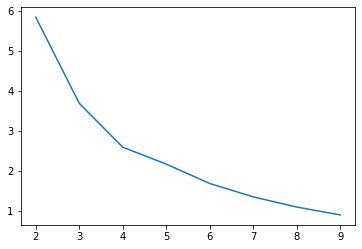

In [77]:
plt.plot(range(2,10),wcss)

In [78]:
X =df.iloc[:,:].values
km=KMeans(n_clusters=3)
y_predict = km.fit_predict(X)

In [79]:
y_predict

array([2, 0, 0, ..., 0, 0, 0])

In [80]:
X[y_predict == 2,2]

array([0.27545304, 0.44579531, 0.23211357, 0.41890474, 0.18389077,
       1.        , 0.60124511, 0.2378734 , 0.69431338, 0.32498367,
       0.92666567])

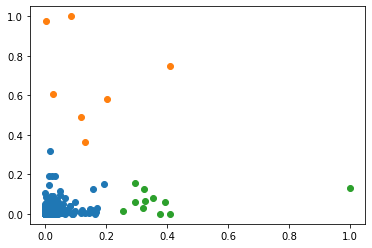

In [81]:
plt.scatter(X[y_predict == 0,0],X[y_predict == 0,1])
plt.scatter(X[y_predict == 1,0],X[y_predict == 1,1])
plt.scatter(X[y_predict == 2,0],X[y_predict == 2,1])

In [82]:
df.shape

(4372, 3)

In [83]:
df['Valuable_customer']=y_predict

In [84]:
df.head()

,Quantity,UnitPrice,New_Revenue,Valuable_customer
CustomerID,,,,
12346.0,0.375789,0.000050,0.275453,2
12347.0,0.012446,0.011630,0.015382,0
12348.0,0.011854,0.004319,0.006414,0
12349.0,0.003195,0.014624,0.006272,0
12350.0,0.000998,0.001578,0.001193,0


In [85]:
df['Valuable_customer'].value_counts()

0    4354
2      11
1       7
Name: Valuable_customer, dtype: int64

##### Here we are create a new new column as valuable customer in this column we have divided customer into three catogery
### 0 - Normal Customer
### 1 - Valuable Customer
### 2 - Most Valuable Customer

<AxesSubplot:xlabel='Valuable_customer', ylabel='count'>

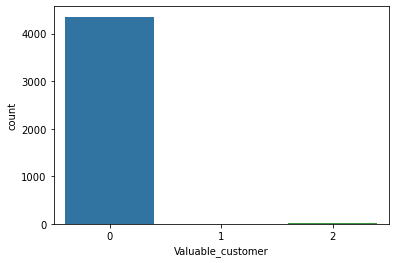

In [86]:
sns.countplot(x=df['Valuable_customer'],data=df)

In [87]:
df[df['Valuable_customer']==2]


,Quantity,UnitPrice,New_Revenue,Valuable_customer
CustomerID,,,,
12346.0,0.375789,0.000050,0.275453,2
12415.0,0.393284,0.060417,0.445795,2
13694.0,0.320582,0.028127,0.232114,2
14156.0,0.293102,0.158165,0.418905,2
14298.0,0.295421,0.059346,0.183891,2
14646.0,1.000000,0.130514,1.000000,2
16446.0,0.410130,0.000171,0.601245,2
16684.0,0.254467,0.017158,0.237873,2
17450.0,0.354411,0.080241,0.694313,2


### Valuable Customer

In [88]:
df[df['Valuable_customer']==1]

,Quantity,UnitPrice,New_Revenue,Valuable_customer
CustomerID,,,,
12744.0,0.026538,0.606842,0.075942,1
12748.0,0.130376,0.365320,0.120339,1
14096.0,0.082799,1.000000,0.232560,1
14911.0,0.407689,0.750687,0.513283,1
15098.0,0.000613,0.973477,0.142454,1
16029.0,0.203594,0.582728,0.289162,1
17841.0,0.116821,0.491421,0.146291,1


### Most Valuable Customer

In [89]:
df[df['Valuable_customer']==0]

,Quantity,UnitPrice,New_Revenue,Valuable_customer
CustomerID,,,,
12347.0,0.012446,0.011630,0.015382,0
12348.0,0.011854,0.004319,0.006414,0
12349.0,0.003195,0.014624,0.006272,0
12350.0,0.000998,0.001578,0.001193,0
12352.0,0.002714,0.053439,0.008944,0
...,...,...,...,...
18280.0,0.000228,0.001152,0.000645,0
18281.0,0.000273,0.000951,0.000288,0
18282.0,0.000522,0.001515,0.000635,0
